{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73}


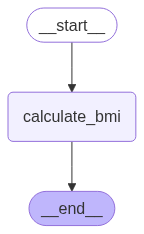

In [4]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from IPython.display import Image


# Define State
class BMIState (TypedDict):
    weight_kg : float
    height_m : float
    bmi : float
    

# Functions 
def calculate_bmi(state: BMIState) -> BMIState:
    
    weight = state["weight_kg"]
    height = state["height_m"]
    
    bmi = weight/(height**2)

    state["bmi"] = round(bmi, 2)
    
    return state


# define the graph
graph = StateGraph(BMIState)

# add notes
graph.add_node("calculate_bmi",calculate_bmi)

# add edges
graph.add_edge(START,"calculate_bmi")
graph.add_edge("calculate_bmi",END)

# compile graph
workflow = graph.compile()

# execute the graph
initial_state = {"weight_kg" : 80, "height_m" : 1.73}

final_state = workflow.invoke(initial_state)

print(final_state)
Image(workflow.get_graph().draw_mermaid_png())

{'weight_kg': 80, 'height_m': 3, 'bmi': 8.89, 'category': 'perfect'}


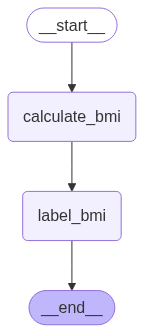

In [3]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from IPython.display import Image


# Define State
class BMIState (TypedDict):
    weight_kg : float
    height_m : float
    bmi : float
    category: str
    

# Functions 
def calculate_bmi(state: BMIState) -> BMIState:
    
    weight = state["weight_kg"]
    height = state["height_m"]
    
    bmi = weight/(height**2)

    state["bmi"] = round(bmi, 2)
    
    return state

def label_bmi(state: BMIState) -> BMIState:
    bmi = state["bmi"]
    if (bmi > 20):
        state["category"] = "obese"
        return state
    
    state["category"] = "perfect"
    return state

# define the graph
graph = StateGraph(BMIState)

# add notes
graph.add_node("calculate_bmi",calculate_bmi)
graph.add_node("label_bmi",label_bmi)

# add edges
graph.add_edge(START,"calculate_bmi")
graph.add_edge("calculate_bmi","label_bmi")
graph.add_edge("label_bmi",END)

# compile graph
workflow = graph.compile()

# execute the graph
initial_state = {"weight_kg" : 80, "height_m" : 3}

final_state = workflow.invoke(initial_state)

print(final_state)
Image(workflow.get_graph().draw_mermaid_png())

{'question': 'A blog of specialities of ai', 'outline': "I. Introduction\n    A. Definition of AI\n    B. Importance of AI in today's world\nII. Specialties of AI\n    A. Machine Learning\n        1. Definition\n        2. Applications\n    B. Natural Language Processing\n        1. Definition\n        2. Applications\n    C. Computer Vision\n        1. Definition\n        2. Applications\n    D. Robotics\n        1. Definition\n        2. Applications\nIII. Advantages of AI\n    A. Efficiency\n    B. Accuracy\n    C. Personalization\nIV. Challenges of AI\n    A. Data privacy\n    B. Bias\n    C. Job displacement\nV. Conclusion\n    A. Recap of AI specialties\n    B. Importance of further research and development in AI.", 'blog': "Artificial Intelligence, or AI, is a rapidly growing field that has the potential to revolutionize the way we live and work. From self-driving cars to personalized recommendations on streaming services, AI is already a part of our daily lives in ways we may n

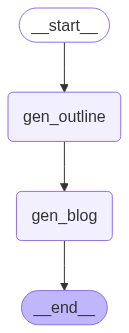

In [1]:
# Prompt Chaining LLM Chain Using LangGraph

from langgraph.graph import StateGraph,START,END
from langchain.prompts import ChatPromptTemplate
from typing import TypedDict
from IPython.display import Image
from langchain_openai import ChatOpenAI
import os
from dotenv import load_dotenv

load_dotenv()

# Making State
class BlogState(TypedDict):
    question : str
    outline : str
    blog : str

# Initialize the LLM with OpenRouter and OpenAI GPT-3.5 Turbo
llm = ChatOpenAI(
    model_name="openai/gpt-3.5-turbo",
    base_url="https://openrouter.ai/api/v1",
    openai_api_key=os.getenv("OPENROUTER_API_KEY"),
    temperature=0.7,
    max_tokens=500,
)

# Node function: fetches answer from LLM given a question
def gen_outline(state: BlogState) -> BlogState:
    # fetching question from state
    query = state['question']
    # Create prompt for the LLM
    prompt = ChatPromptTemplate.from_template(f"Generate a outline for making blog of this question: {query}. It should be concise and readable for other llm to generate a good blog.")
    # Chain prompt to LLM
    chain = prompt | llm
    # Invoke the chain and get response
    response = chain.invoke({"query": query})
    state['outline'] = response.content
    return state

def gen_blog(state: BlogState) -> BlogState:
    # fetching question from state
    outline = state['outline']
    question = state["question"]
    # Create prompt for the LLM
    prompt = ChatPromptTemplate.from_template(f"Write a blog on the title :{question},\n Using the following Outline:{outline}.")
    # Chain prompt to LLM
    chain = prompt | llm
    # Invoke the chain and get response
    response = chain.invoke({"question": question, "outline" : outline})
    state['blog'] = response.content
    return state


# Create a state graph for the QA workflow
graph = StateGraph(BlogState)

# Add fetch_answer node to the graph
graph.add_node("gen_outline", gen_outline)
graph.add_node("gen_blog", gen_blog)

# Define graph edges: start -> fetch_answer -> end
graph.add_edge(START, "gen_outline")
graph.add_edge("gen_outline","gen_blog")
graph.add_edge("gen_blog", END)

# Compile the workflow
workflow = graph.compile()

# Get user query and run the workflow
query = input("Enter Query: ")
result = workflow.invoke({"question": query})

# Print the result
print(result)
Image(workflow.get_graph().draw_mermaid_png())

{'original_text': ' Essay: “The Role of Technology in Modern Education”\nIn today’s world, technology has become an inseparable part of education. Students now have access to online resources, video lectures, and interactive tools that make learning faster and more engaging. With just a few clicks, one can learn coding, mathematics, or even history from experts around the world.\nHowever, over-reliance on technology can be harmful. Many students become distracted by social media while studying, and sometimes the depth of learning decreases when answers are instantly available online. Traditional methods like reading books and face-to-face discussions still hold great importance in building critical thinking.\nIn conclusion, technology is a powerful tool that can transform education if used wisely. A balance between digital learning and traditional approaches ensures that students not only gain knowledge but also learn discipline, focus, and deeper understanding. ', 'structure_grade': G

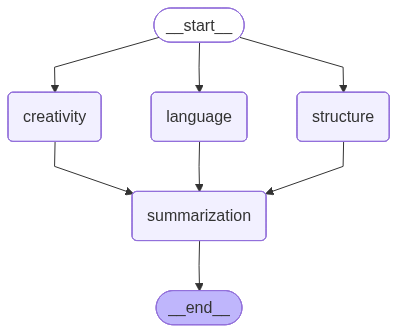

In [2]:
# Prompt Chaining LLM Chain Using LangGraph

from langgraph.graph import StateGraph,START,END
from langchain.prompts import ChatPromptTemplate
from typing import TypedDict
from IPython.display import Image
from langchain_openai import ChatOpenAI
import os
from dotenv import load_dotenv
from pydantic import BaseModel,Field
from langchain.output_parsers import PydanticOutputParser

load_dotenv()

# Making State

class GradeModel(BaseModel):
    text: str = Field(..., description="Summary of grading")
    grade: int = Field(..., description="Grades (1-10)")
    
class EssayState(TypedDict):
    original_text : str
    structure_grade : GradeModel
    language_grade : GradeModel
    creativity_grade : GradeModel
    summary : str

# Initialize the LLM with OpenRouter and OpenAI GPT-3.5 Turbo
llm = ChatOpenAI(
    model_name="openai/gpt-oss-20b:free",
    base_url="https://openrouter.ai/api/v1",
    openai_api_key=os.getenv("OPENROUTER_API_KEY"),
    temperature=0.7,
    # max_tokens= 261,
)

parser = PydanticOutputParser(pydantic_object=GradeModel)
# Functions / Nodes
def structureGrading(state : EssayState):
    original_text = state["original_text"]
    
    prompt = ChatPromptTemplate.from_messages([
        ("system", "You are a structure grading expert."),
        ("human", "Summarize and Grade the following text on the basis of its structure : {text}. Summarize should be of 2 3 lines. Return the response it the following structure : {structure}")
    ])

    chain = prompt | llm | parser
    
    response = chain.invoke({
        "text" : original_text,
        "structure" : parser.get_format_instructions()
    })
    
    return {"structure_grade" : response}
    
def languageGrading(state : EssayState):
    original_text = state["original_text"]
    
    prompt = ChatPromptTemplate.from_messages([
        ("system", "You are a grading expert on the basis of language."),
        ("human", "Summarize and Grade the following text on the basis of its language : {text}. Summarization should be of 2 3 lines. Return the response it the following structure : {structure}")
    ])

    chain = prompt | llm | parser
    
    response = chain.invoke({
        "text" : original_text,
        "structure" : parser.get_format_instructions()
    })
    
    # print ("response -->", response)
    
    return {"language_grade" : response}

def creativityGrading(state : EssayState):
    original_text = state["original_text"]
    
    prompt = ChatPromptTemplate.from_messages([
        ("system", "You are a creativity grading expert."),
        ("human", "Summarize and Grade the following text on the basis of its creativity : {text}. Summarization should be of 2 3 lines. Return the response it the following structure : {structure}")
    ])

    chain = prompt | llm | parser
    
    response = chain.invoke({
        "text" : original_text,
        "structure" : parser.get_format_instructions()
    })
    
    return {"creativity_grade" : response}


def gen_summary(state: EssayState):
    
    prompt = ChatPromptTemplate.from_messages([
        ("system", "You are an expert at summarizing and evaluating essays based on structure, language, and creativity."),
        ("human", """Given the following grading results, write a concise summary of the essay's overall performance. Clearly mention the strengths and weaknesses in each area, and provide the grading scores in a readable format.

Structure Grade: {structure_grades}
Language Grade: {language_grades}
Creativity Grade: {creativity_grades}

Your response should include:
- A brief summary of the essay's overall quality.
- Specific comments on structure, language, and creativity.
- The grading scores for each category.
""")
    ])

    chain = prompt | llm
    
    response = chain.invoke({
        "structure_grades" : state["structure_grade"].model_dump_json(),
        "language_grades" : state["language_grade"].model_dump_json(),
        "creativity_grades" : state["creativity_grade"].model_dump_json()
    }).content

    return {"summary" : response}

graph = StateGraph(EssayState)

# Adding Nodes
graph.add_node("structure", structureGrading)
graph.add_node("language", languageGrading)
graph.add_node("creativity", creativityGrading)
graph.add_node("summarization", gen_summary)

# Adding egdes
graph.add_edge(START,"structure")
graph.add_edge(START,"language")
graph.add_edge(START,"creativity")

graph.add_edge("structure", "summarization")
graph.add_edge("language", "summarization")
graph.add_edge("creativity", "summarization")

graph.add_edge("summarization", END)

# Compiling
workflow = graph.compile()

# Executing
essay = {"original_text" : """ Essay: “The Role of Technology in Modern Education”
In today’s world, technology has become an inseparable part of education. Students now have access to online resources, video lectures, and interactive tools that make learning faster and more engaging. With just a few clicks, one can learn coding, mathematics, or even history from experts around the world.
However, over-reliance on technology can be harmful. Many students become distracted by social media while studying, and sometimes the depth of learning decreases when answers are instantly available online. Traditional methods like reading books and face-to-face discussions still hold great importance in building critical thinking.
In conclusion, technology is a powerful tool that can transform education if used wisely. A balance between digital learning and traditional approaches ensures that students not only gain knowledge but also learn discipline, focus, and deeper understanding. """
}

result = workflow.invoke(essay)
print(result)

Image(workflow.get_graph().draw_mermaid_png())